# Thunderbay Population Forecasting 

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Read / Clean the data

In [27]:
data = pd.read_csv('Thunderbay_Population.csv')
data.columns = data.columns.str.strip()

for i in range(1, len(data)):
    data.loc[i, 'growth'] = (data.loc[i, 'population'] - data.loc[i-1, 'population']) / data.loc[i-1, 'population']

data['growth'][0]=0

data.head(5)

,year,population,growth
0,2012,111374,0.000000
1,2017,111687,0.002810
2,2020,112602,0.008193
3,2024,113834,0.010941


## Intrapolating Data to make a more accurate model

In [28]:
df_interpolated = data.set_index('year').reindex(range(2012, 2025)).interpolate().reset_index()

df_interpolated.head()

,year,population,growth
0,2012,111374.0,0.000000
1,2013,111436.6,0.000562
2,2014,111499.2,0.001124
3,2015,111561.8,0.001686
4,2016,111624.4,0.002248


## Plot the Data to find Trend

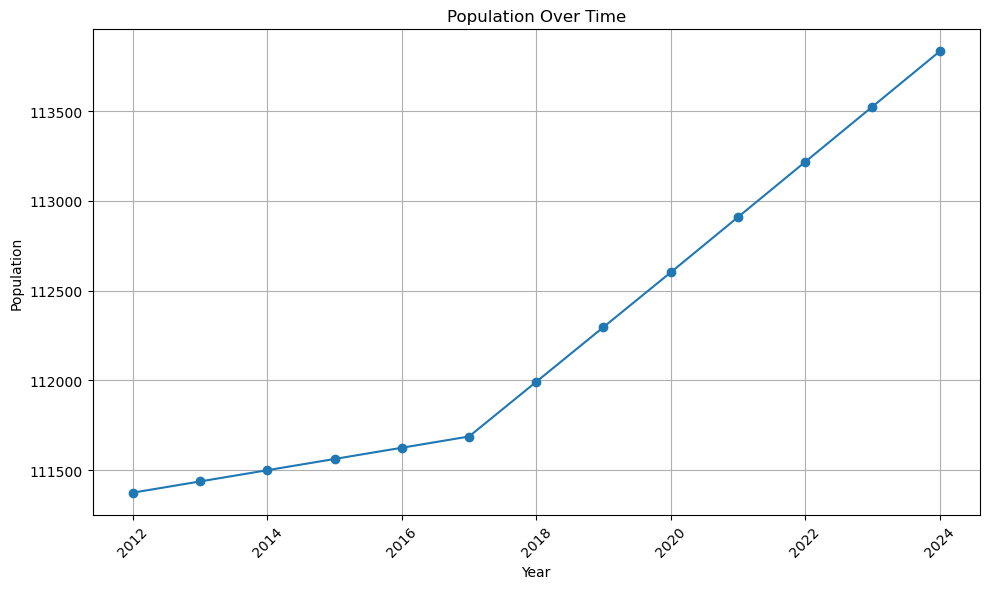

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated['year'], df_interpolated['population'], marker='o', linestyle='-')
plt.title('Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Split the data into Train and Test 

In [30]:
from sklearn.model_selection import train_test_split

X = df_interpolated[['year']]
y = df_interpolated['population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fit and Train the Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

## Cofficient and Intercept of Model

In [32]:
# Coefficients
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)

Coefficients: [224.84100418]
Intercept: -341501.43933054374


## Plotting Linear Regression Model and Population Graph

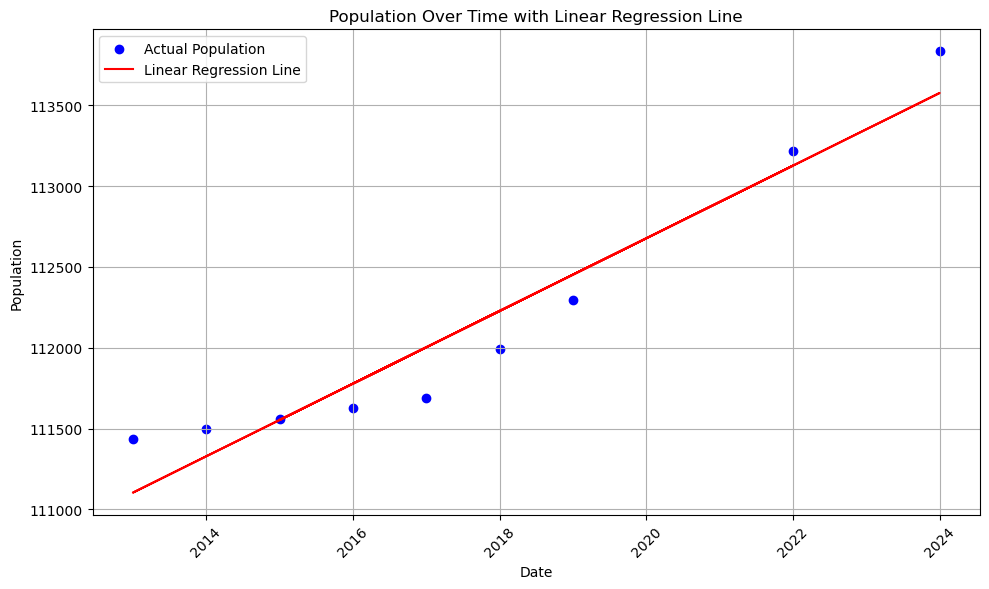

In [33]:

# Plot the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Population')
plt.plot(X_train, predictions_train, color='red', label='Linear Regression Line')
plt.title('Population Over Time with Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
from sklearn import metrics
mape_test = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print("MAE:", metrics.mean_absolute_error(y_test, predictions_test))
print("MSE:", metrics.mean_squared_error(y_test, predictions_test))

print("MAPE for testing set:", mape_test) # 2.73% deviate from the actual dataset

MAE: 188.14644351464813
MSE: 70352.7783914843
MAPE for testing set: 0.16798307830703563


## Predict Fututre Years Population

In [36]:
future_years = [2025, 2026, 2027, 2028, 2029, 2030]
X_future = pd.DataFrame({'year': future_years})

predictions_future = lm.predict(X_future)

predictions_df = pd.DataFrame({'year': future_years, 'population': predictions_future})
predictions_df.head()

,year,population
0,2025,113801.594142
1,2026,114026.435146
2,2027,114251.276151
3,2028,114476.117155
4,2029,114700.958159
